In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [180]:
def integrand(z, Omega_m, Omega_L):
    return ((1.0+z)**2.0*(1.0+Omega_m*z) - z*(2.0+z)*Omega_L)**-0.5
    
def luminsity_D(H_0, z, Omega_m, Omega_L):
    c = 2.99E5
    k = 1 - Omega_m - Omega_L
    integral = integrate.quad(integrand, 0, z, args=(Omega_m, Omega_L))[0]
    if k>=0:
        D_L = c*(1+z)/(H_0 * np.sqrt(np.abs(k))) * np.sinh(np.sqrt(np.abs(k))*integral)
    elif k<0:
        D_L = c*(1+z)/(H_0 * np.sqrt(np.abs(k))) * np.sin(np.sqrt(np.abs(k))*integral)
    return D_L

def mu_p(D_L):
    return 5.0*np.log10(D_L) + 25.0

In [105]:
integrate.quad(integrand, 0, 1, args=(0.5, 0.5))

(0.6966102939360831, 7.733927875187374e-15)

In [187]:
Omega_m_t = np.linspace(0, 2.5, 20)
Omega_L_t = np.linspace(-1, 3, 20)

In [184]:
def grid(Omega_m_t, Omega_L_t, z, m_obs, sigma_z, sigma_mu):
    xi_z = np.zeros(len(z))
    xis = np.zeros((len(Omega_m_t),len(Omega_L_t)))
    for i in range(len(Omega_m_t)):
        for j in range(len(Omega_L_t)):
            for k in range(len(z)):
                Omega_K = 1 - Omega_m_t[i] - Omega_L_t[j]
                Dl = integrate.quad(luminsity_D, -inf, inf ,args=(z[k], Omega_m_t[i], Omega_L_t[j]))[0]
                m_teo = mu_p(Dl)
                xi_z[k] =  (m_teo - m_obs[k])**2.0/(sigma_z[k]**2.0 + sigma_mu[k]**2.0)
            xis[i][j] = sum(xi_z)
    return xis

In [185]:
obs_data = loadtxt('Campbell_data_clean.txt')
z = obs_data[:,0]
z_err = obs_data[:,1]
mu = obs_data[:,2]
mu_err = obs_data[:,3]

In [126]:
!head -1 Campbell_data_clean.txt

3.056789999999999785e-01  2.979999999999999929e-05  4.121289999999999765e+01  2.190439999999999887e-01  1.000999999999999979e+01  2.600000000000000089e-01  -3.955440000000000345e-02  4.528760000000000008e-01  -1.054959999999999987e+01  1.021849999999999925e+00  8.626690500000000483e+00  4.131859999999999700e-02


In [ ]:
xis_test = grid(Omega_m_t, Omega_L_t, z, mu, z_err, mu_err)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [ ]:
imshow(xis_test.T, origin='lower', extent=[min(Omega_m_t), max(Omega_m_t), min(Omega_L_t), max(Omega_L_t)])

In [174]:
norm = np.abs(np.nanmin(xis_test))
Post = np.exp(-xis_test.T/(2.0*norm))
print norm

2073.92792597


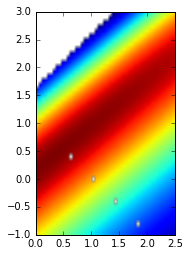

In [175]:
imshow(Post, origin='lower', extent=[min(Omega_m_t), max(Omega_m_t), min(Omega_L_t), max(Omega_L_t)])

In [179]:
index = np.where(Post==np.nanmax(Post))
print index[0], index[1]
print Omega_m_t[index[0]]
print Omega_L_t[index[1]]

[14] [0]
[ 0.71428571]
[-1.]


In [86]:
#test 60.058594 0.004883 -0.742188 6.281697 


In [108]:
xi_test = grid(np.array([0.004883]), np.array([-0.742188]), z, mu, z_err, mu_err)
print xi_test/(len(z)-3.)

[[ 6.26488079]]


In [109]:
xi_test = grid(np.array([0.004883]), np.array([-0.734375]), z, mu, z_err, mu_err)
print xi_test/(len(z)-3.)

[[ 6.29311452]]


In [73]:
print index

(array([55]), array([99]))


In [74]:
np.nanmin(xis_test)

58288.636750070356